In [1]:
import cv2
import sklearn
import sys
sys.executable
import glob
from scipy import ndimage, misc
import circle_fit as cf

img_list = []

for img in glob.glob("CCD-1/*.jpg"):
    img_list.append(cv2.imread(img,0))

./CCD-1/new (111).jpg
1114.2522936946766 1090.5309818350704 758.4257301824432
1116.9656752955586 1092.4328352741677 641.4585813250269
0
1


True

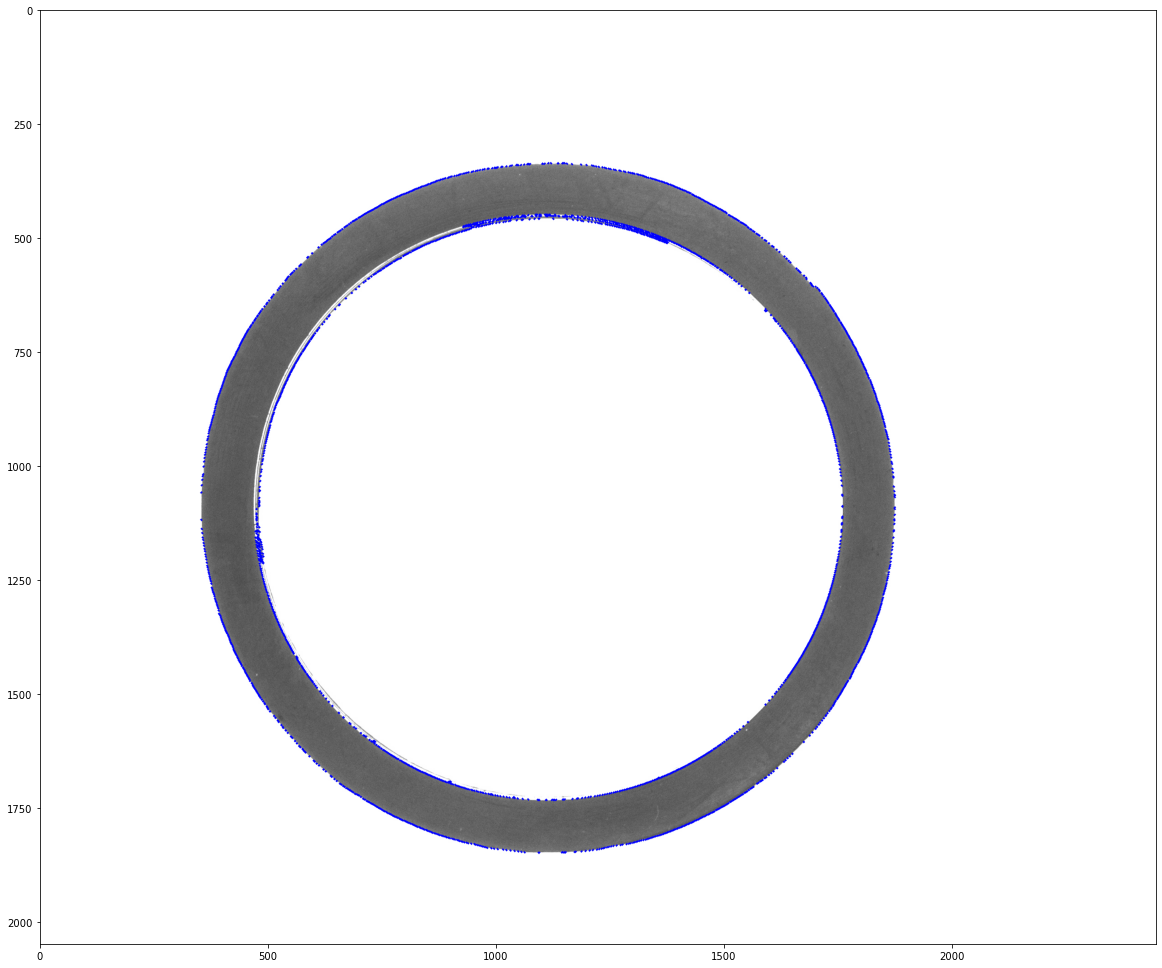

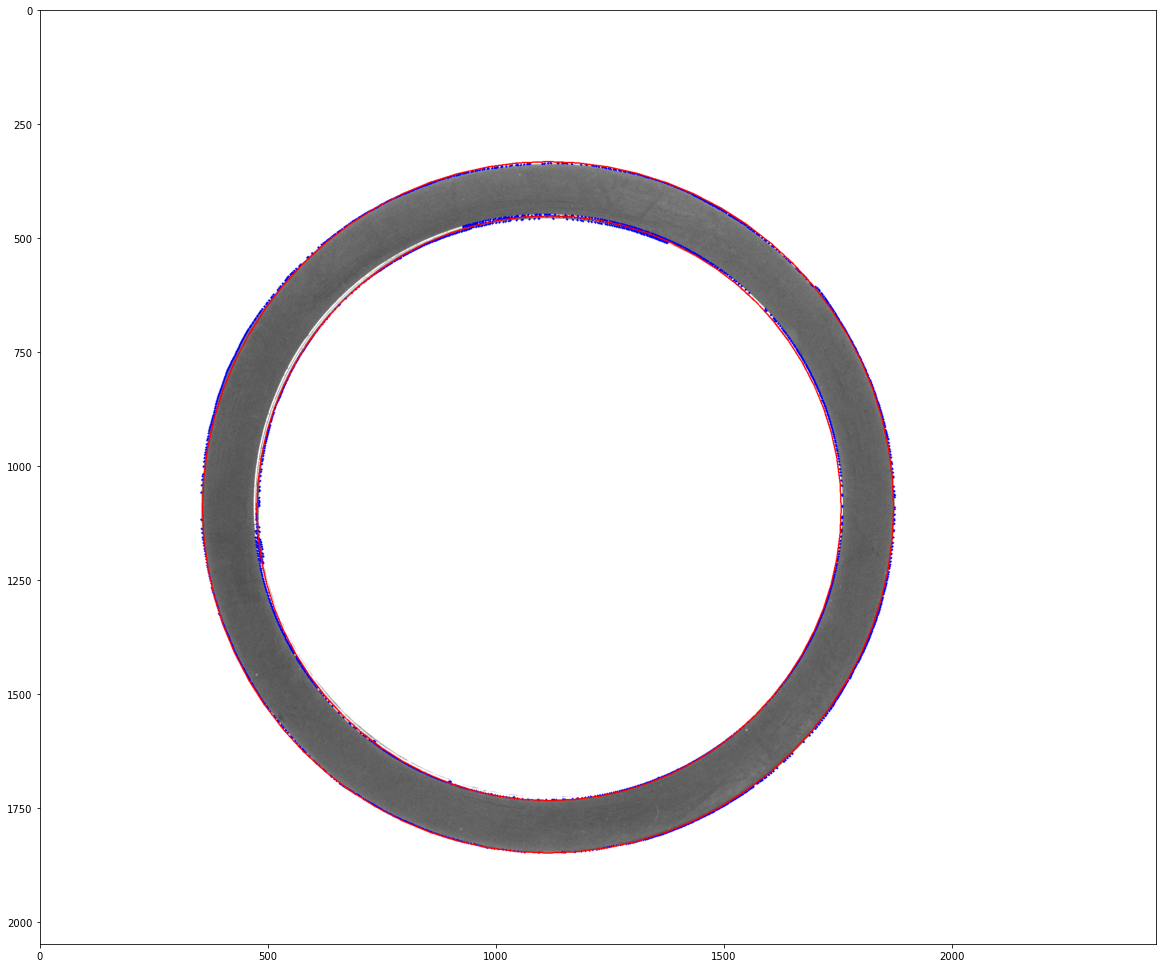

In [83]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#replace========================
filename = './CCD-1/new (111).jpg'
print(filename)
img_list[8] = np.array(cv2.imread(filename,0))
#print(img_list[8])
#========================
                       
gray = img_list[8]

ret, thresh1 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
#print(gray)

#print(thresh1)


_ , contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)

for i in range(np.array(contours).shape[0]):
    if(np.array(contours[i]).shape[0]>1500):
        cv2.drawContours(backtorgb,contours[i],-1,(0,0,255),3)
        #print(i)


#cv2.imshow("img", gray)
#cv2.waitKey(0)

'''
for i in range(np.array(contours).shape[0]):
        if(np.array(contours[i]).shape[0]>1500):
            print(np.array(contours[i]).shape)
'''

import circle_fit as cf

circle_point = []

for i in range(np.array(contours).shape[0]):
        if(np.array(contours[i]).shape[0]>1500):
            #print(np.array(contours[i]).shape)

            cor = np.array(contours[i])
            cor = cor.reshape(cor.shape[0],cor.shape[2])
            #print(cor.shape)

            xc,yc,r,_ = cf.least_squares_circle(cor)
            print(xc,yc,r)
            circle_point.append([xc,yc,r])

            #===========
            #cv2.circle(backtorgb,(1115, 1081), 640, (255, 0, 0), -1)
            #cv2.circle(backtorgb,(xc.astype(int), yc.astype(int)), r.astype(int), (255, 0, 0), 2)
            #=============

plt.figure(figsize=(20,20))
plt.imshow(backtorgb)



cor = np.array(contours[1])
cor = cor.reshape(cor.shape[0],cor.shape[2])
#print(cor.shape)

xc,yc,r,_ = cf.least_squares_circle(cor)
#print(xc,yc,r)

for i in range(len(circle_point)):
    print(i)
    cv2.circle(backtorgb,(circle_point[i][0].astype(int), circle_point[i][1].astype(int)), circle_point[i][2].astype(int), (255, 0, 0), 2)
    
#=============

plt.figure(figsize=(20,20))
plt.imshow(backtorgb)
cv2.imwrite('contour.jpg',backtorgb)

In [84]:
def mask_innercicle(img):
    
    ret, thresh1 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
    _ , contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    import circle_fit as cf

    circle_point = []

    for i in range(np.array(contours).shape[0]):
            if(np.array(contours[i]).shape[0]>1500):
                #print(np.array(contours[i]).shape)

                cor = np.array(contours[i])
                cor = cor.reshape(cor.shape[0],cor.shape[2])
                #print(cor.shape)

                xc,yc,r,_ = cf.least_squares_circle(cor)
                print(xc,yc,r)
                circle_point.append([xc,yc,r])

    cor = np.array(contours[1])
    cor = cor.reshape(cor.shape[0],cor.shape[2])

    xc,yc,r,_ = cf.least_squares_circle(cor)

    h = img.shape[0]
    w = img.shape[1]
    center = (circle_point[1][0].astype(int), circle_point[1][1].astype(int))
    radius = circle_point[1][2].astype(int)
    mask = create_circular_mask(h, w, center=center, radius=radius)
    
    mask_array = np.ma.masked_array(img, mask=mask,fill_value = 255)
    img_temp = mask_array.filled()
    return img_temp

In [85]:
img_temp = img_list[8][int(xc):,int(yc):]
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center < (radius+10)
    return mask

h = img_temp.shape[0]
w = img_temp.shape[1]
center = (circle_point[i][0].astype(int), circle_point[i][1].astype(int))
radius = circle_point[i][2].astype(int)
mask = create_circular_mask(h, w, center=center, radius=radius)
#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')

In [86]:
mask_array = np.ma.masked_array(img_temp, mask=mask,fill_value = 255)
img_temp = mask_array.filled()

1114.2522936946766 1090.5309818350704 758.4257301824432
1116.9656752955586 1092.4328352741677 641.4585813250269


"\nedged=cv2.Canny(img_temp,3,40)#3 33\n\n\nplt.figure(figsize=(20,20))\nplt.imshow(img_temp,cmap = 'gray')\n\nplt.figure(figsize=(20,20))\nplt.imshow(edged,cmap = 'gray')\n#ret,thresh1 = cv2.threshold(block_img,100,255,cv2.THRESH_BINARY_INV)#THRESH_TOZERO_INV\nkernel = np.ones((5,5),np.uint8)\n#opening = cv2.morphologyEx(edged, cv2.MORPH_OPEN, kernel)\nclosing = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)\n\n\n\n\nplt.figure(figsize=(20,20))\nplt.imshow(closing,cmap = 'gray')\nsift = cv2.xfeatures2d.SIFT_create()\nkp = sift.detect(img_temp,None)\nimg=cv2.drawKeypoints(img_temp,kp,img_temp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)\nplt.figure(figsize=(20,20))\nplt.imshow(img,cmap = 'gray')\n"

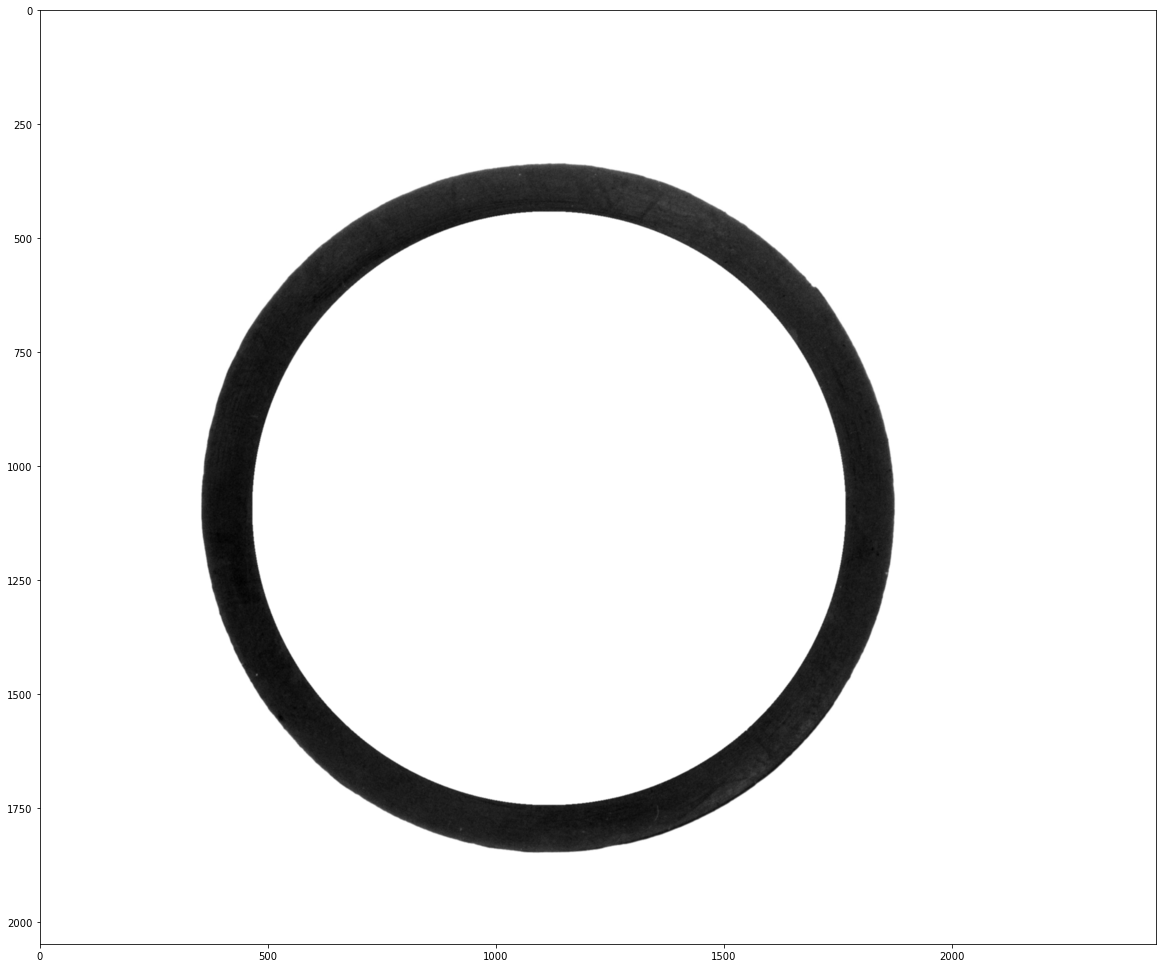

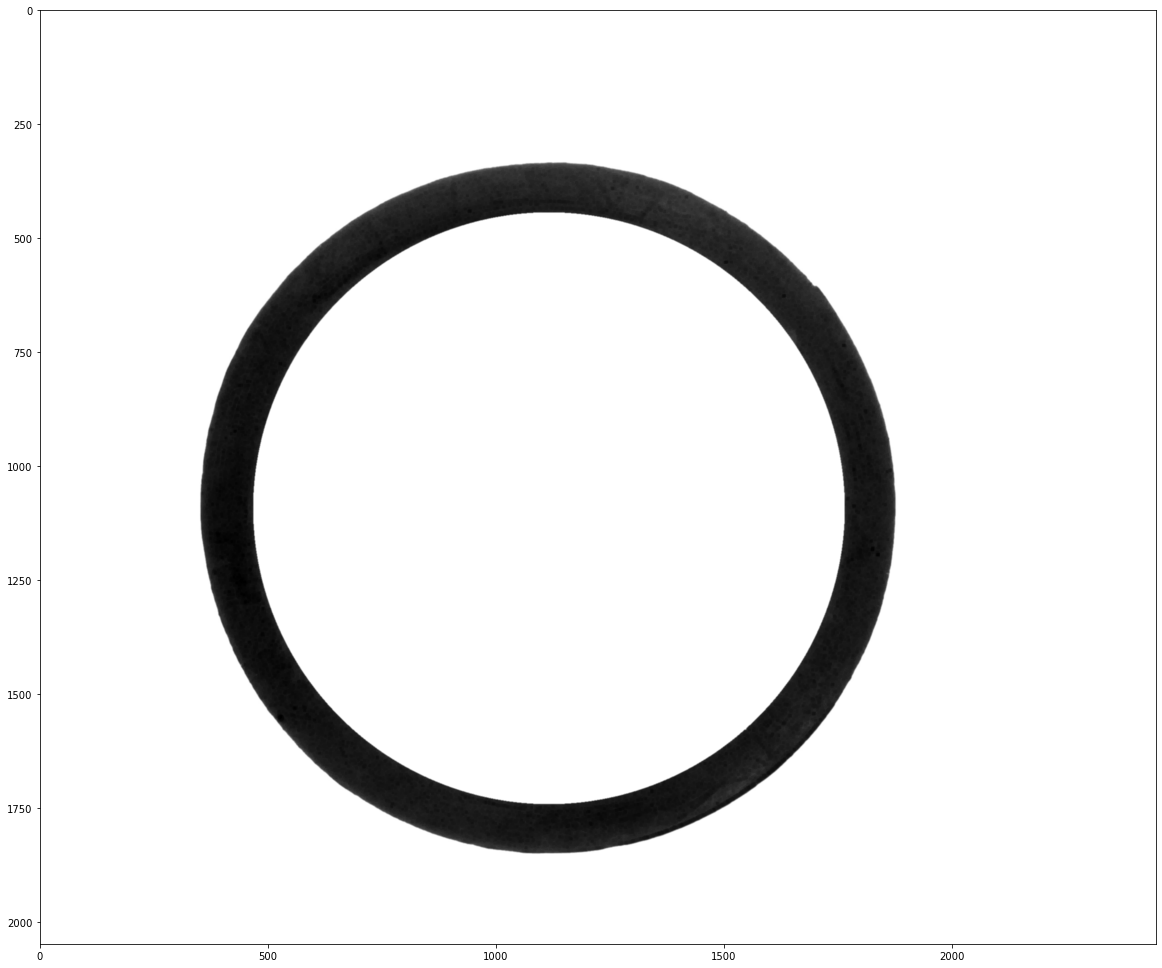

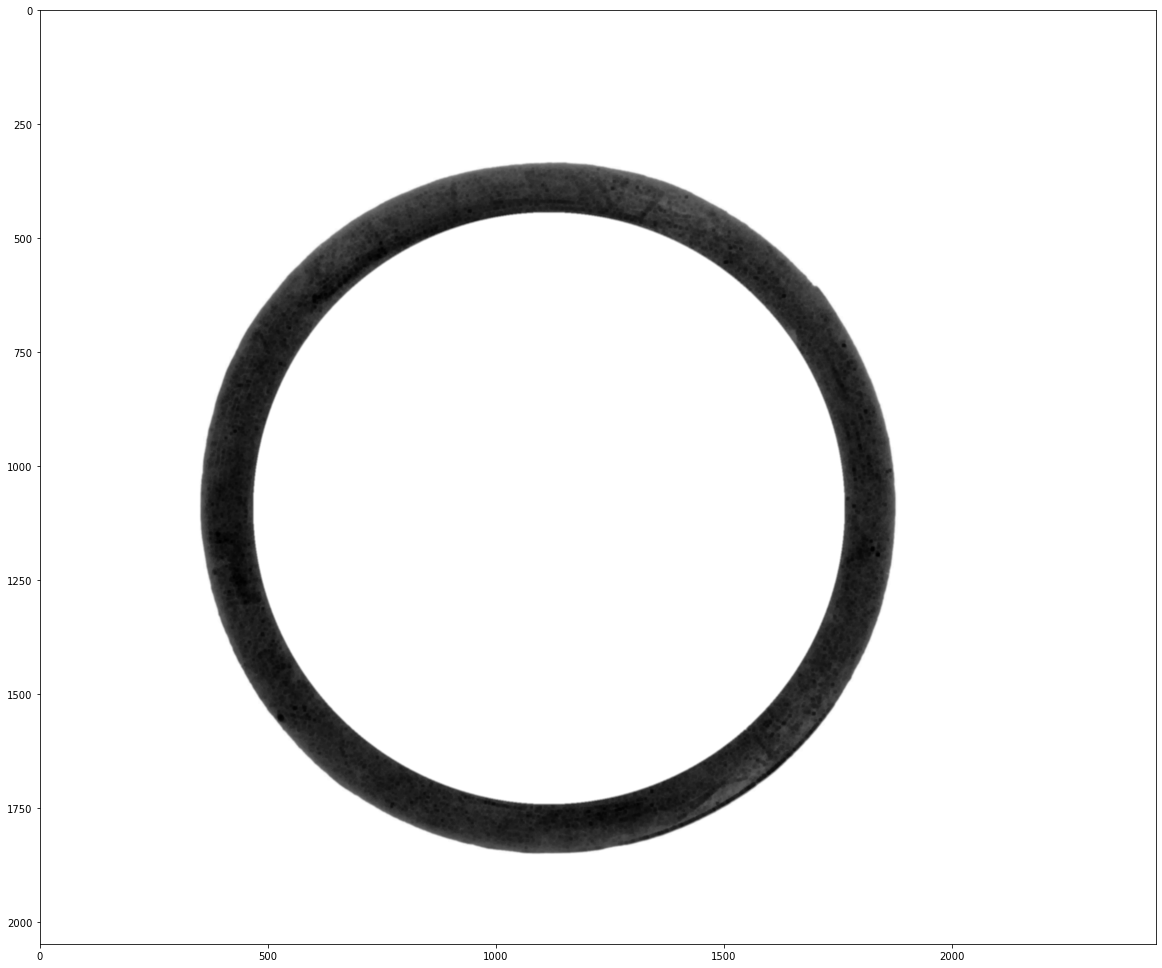

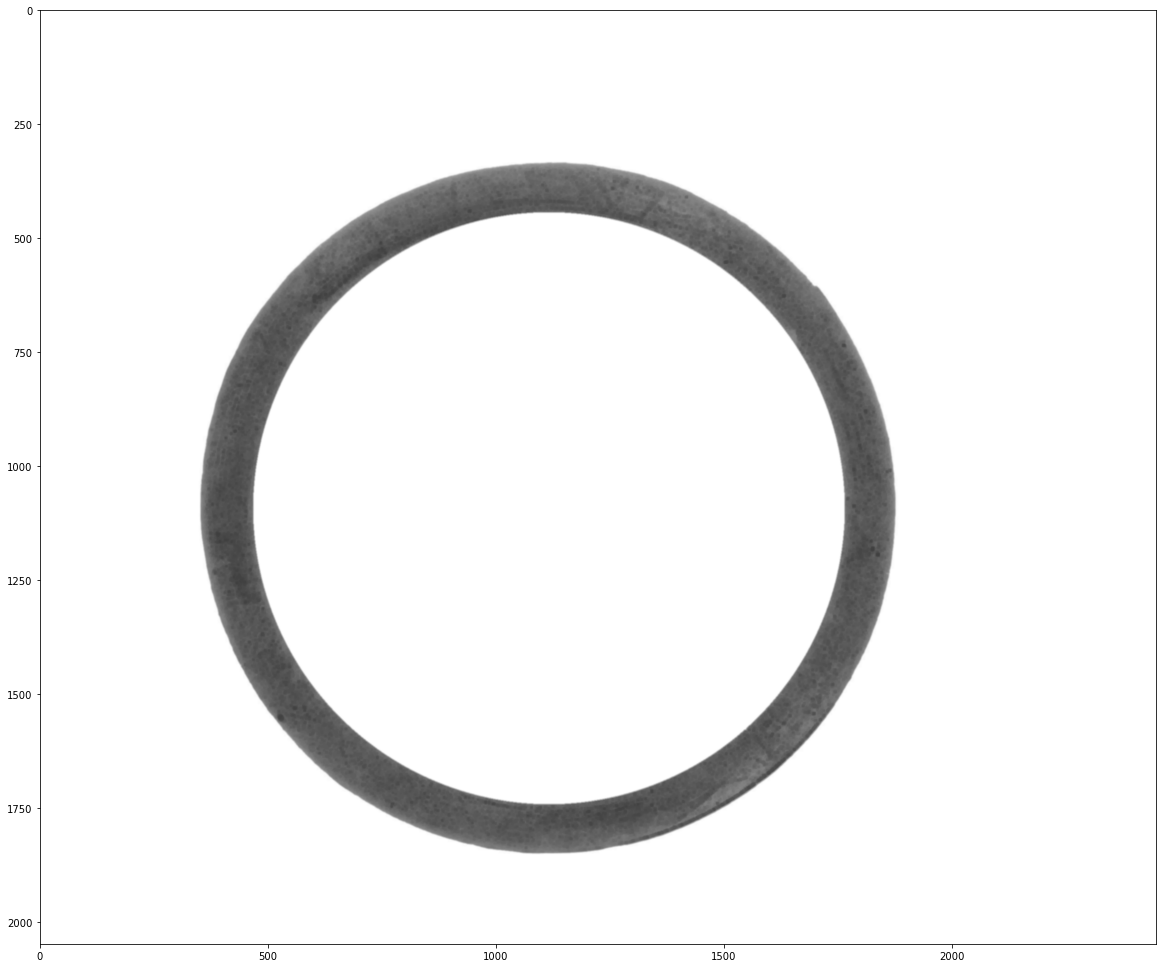

In [87]:
img_temp = img_list[8]


img_temp.shape
img_temp = mask_innercicle(img_temp)
#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')

#cv2.imwrite('1.jpg',img_temp)
#img_temp = cv2.blur(img_temp,(5,5))

#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')
img_temp = cv2.blur(img_temp,(3,3))

plt.figure(figsize=(20,20))
plt.imshow(img_temp,cmap = 'gray')
img_temp = ndimage.minimum_filter(img_temp, size=5)
plt.figure(figsize=(20,20))
plt.imshow(img_temp,cmap = 'gray')
#plt.figure(figsize=(20,20))
#plt.imshow(img_temp,cmap = 'gray')
img_temp = cv2.blur(img_temp,(3,3))
#clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(20,20))#cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))



img_temp = clahe.apply(img_temp)

plt.figure(figsize=(20,20))
plt.imshow(img_temp,cmap = 'gray')
#img_temp = img_temp - blur
vis = img_temp.copy()
mser = cv2.MSER_create(_delta=3, _min_area=300,_max_variation=0.2)#cv2.MSER_create(_delta=3, _min_area=100,_max_variation=0.3)
#mser = cv2.MSER_create(_delta=3, _min_area=100,_max_variation=0.3)
regions = mser.detectRegions(img_temp)

#print(regions)


hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
#print(np.array(hulls[0]))
vis = cv2.cvtColor(vis,cv2.COLOR_GRAY2RGB)

cv2.polylines(vis, hulls, 1, (255, 0, 0))
#print(hulls)

plt.figure(figsize=(20,20))
plt.imshow(vis,cmap = 'gray')

'''
edged=cv2.Canny(img_temp,3,40)#3 33


plt.figure(figsize=(20,20))
plt.imshow(img_temp,cmap = 'gray')

plt.figure(figsize=(20,20))
plt.imshow(edged,cmap = 'gray')
#ret,thresh1 = cv2.threshold(block_img,100,255,cv2.THRESH_BINARY_INV)#THRESH_TOZERO_INV
kernel = np.ones((5,5),np.uint8)
#opening = cv2.morphologyEx(edged, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)




plt.figure(figsize=(20,20))
plt.imshow(closing,cmap = 'gray')
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(img_temp,None)
img=cv2.drawKeypoints(img_temp,kp,img_temp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(20,20))
plt.imshow(img,cmap = 'gray')
'''

In [69]:
cv2.__version__

'3.4.2'

In [ ]:
|